In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2013-01-01','2014-01-01'))

min_temperature = []
avg_temperature = []
max_temperature = []
years = []


for each in np.arange(1,9,1): 
    start_date = start + each*(dt.timedelta(days=365))
    end_date = start_date + dt.timedelta(days=365)
    temperature_calc = calc_temps(start_date,end_date)
    
    #append min temp
    min_temp = temperature_calc[0][0]
    min_temperature.append(min_temp)
    
    #append avg temp
    avg_temp = temperature_calc[0][1]
    avg_temperature.append(avg_temp)
    
    #append max temp
    max_temp = temperature_calc[0][1]
    max_temperature.append(max_temp)
    
    #add year
    year = start_date.year
    years.append(year)

temperature_df = pd.DataFrame({'Year': years,'Min Temp': min_temperature, 'Max Temp': max_temperature, 'Avg Temp': avg_temperature})

temperature_df['Max - Min Temp'] = temperature_df['Max Temp'] - temperature_df['Min Temp']
temperature_df

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temperature_df.plot.bar(x = 'Year', y = 'Avg Temp', yerr = 'Max - Min Temp')
plt.title('Trip Avg Temp')
plt.show()

### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
precipitation_year = session.query(Measurement.date, Measurement.prcp, Measurement.station).\
        filter(Measurement.date >= '2016-01-01').filter(Measurement.date <= '2017-01-01').all()

precipitation_df = pd.DataFrame(precipitation_year, columns=['Date', 'Precipitation', 'Station'])
precipitation_df = precipitation_df.set_index(['Date'])

station_precipitation = precipitation_df.groupby('Station').sum()

station_precipitation.sort_values(by = 'Precipitation', ascending = False)

### Daily Temperature Normals

In [9]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [18]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.date(2017,8,1) #'2017-08-01'
end_date = dt.date(2017,8,7 )#'2017-08-07'

dates = []
# Use the start and end date to create a range of dates
for each in np.arange(0,7,1):
    date = start_date + each*(dt.timedelta(days=1))
    dates.append(date)
    
# Strip off the year and save a list of strings in the format %m-%d

dates_func = []
for date in dates:
    day = '0'+ str(date.day)
    month = '0' + str(date.month)
    day_month = "-".join((day,month))
    dates_func.append(day_month)
    
dates_func
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []
for day in dates_func:
    normals.append(daily_normals(day))

normals

[[(57.0, 67.16071428571429, 75.0)],
 [(56.0, 66.75438596491227, 74.0)],
 [(59.0, 68.72413793103448, 78.0)],
 [(66.0, 72.10526315789474, 77.0)],
 [(65.0, 72.18867924528301, 80.0)],
 [(70.0, 75.58620689655173, 81.0)],
 [(69.0, 76.08333333333333, 83.0)]]

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
min_temperature = []
avg_temperature = []
max_temperature = []
date_normal = []

normals[1][0][0]
for each in np.arange(0,7,1): 
    date = dates[each]
    date_normal.append(date)
    
    #append min temp
    min_temp = normals[each][0][0]
    min_temperature.append(min_temp)
    
    #append avg temp
    avg_temp = normals[each][0][1]
    avg_temperature.append(avg_temp)
    
    #append max temp
    max_temp = normals[each][0][2]
    max_temperature.append(max_temp)

normals_df = pd.DataFrame({'Date': date_normal,'Min Temp': min_temperature, 'Max Temp': max_temperature, 'Avg Temp': avg_temperature})

normals_df.set_index('Date')

,Min Temp,Max Temp,Avg Temp
Date,,,
2017-08-01,57.0,75.0,67.160714
2017-08-02,56.0,74.0,66.754386
2017-08-03,59.0,78.0,68.724138
2017-08-04,66.0,77.0,72.105263
2017-08-05,65.0,80.0,72.188679
2017-08-06,70.0,81.0,75.586207
2017-08-07,69.0,83.0,76.083333


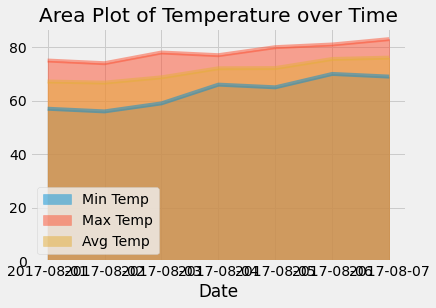

In [39]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(x = 'Date', stacked = False)
plt.title('Area Plot of Temperature over Time')
plt.show()

## Close Session

In [41]:
session.close()